In [95]:
import os
import sys
sys.path.append('..') 
import yaml
import pandas as pd
import numpy as np
import pickle
from src.utils.utils_p import YamlParser,Upload_Download_Pickle,Config_Paths
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [96]:
path=Config_Paths().get_processed_path()
cpath=Config_Paths().get_combineddatasets_path()
Features_df=Upload_Download_Pickle().download_pickle(cpath, 'Features_df')
AllLabels_df=Upload_Download_Pickle().download_pickle(cpath, 'AllLabels_df')
#selectedFeatures=Upload_Download_Pickle().download_pickle(path, 'selectedFeatures')

ParserError: while parsing a block mapping
  in "D:\Users\sezgis\Documents\Git\Diagnostic_Pitch_System\src\importcsv.yaml", line 35, column 5
expected <block end>, but found '<block mapping start>'
  in "D:\Users\sezgis\Documents\Git\Diagnostic_Pitch_System\src\importcsv.yaml", line 37, column 7

In [3]:
AllLabels_df.columns

Index(['Brake system', 'Brake systemEv', 'Brake systemEv_multiclass',
       'Components', 'Components_multiclass', 'Converter', 'ConverterEv',
       'ConverterEv_multiclass', 'Events', 'Events_0', 'Events_EVENT_001',
       'Events_EVENT_014', 'Events_EVENT_015', 'Events_EVENT_016',
       'Events_EVENT_019', 'Events_EVENT_027', 'Events_EVENT_028',
       'Events_EVENT_031', 'Events_EVENT_034', 'Events_EVENT_035',
       'Events_EVENT_045', 'Events_EVENT_051', 'Events_EVENT_052',
       'Events_EVENT_053', 'Events_EVENT_054', 'Events_EVENT_060',
       'Events_EVENT_062', 'Events_EVENT_063', 'Events_EVENT_071',
       'Events_EVENT_077', 'Events_EVENT_097', 'Events_EVENT_102',
       'Events_EVENT_106', 'Events_EVENT_108', 'Events_EVENT_113',
       'Events_EVENT_114', 'Events_EVENT_118', 'Events_EVENT_121',
       'Events_EVENT_124', 'Events_EVENT_134', 'Events_EVENT_137',
       'Events_EVENT_141', 'Events_EVENT_142', 'Events_EVENT_144',
       'Events_EVENT_149', 'Events_EVENT_150

In [42]:
Features_df.columns

Index(['Period', 'Power_kW', 'Rotor_rpm', 'Nacelle_Position', 'Generator_rpm',
       'Torque_act_Percent', 'Torque_set_Percent', 'Tower_acc_normal',
       'Tower_acc_lateral', 'Tower_base_temp_C', 'Ambient_temp_C',
       'Windspeed_m_s', 'gearboxbearing_temp_C',
       'GBX_bearing_hollow_shaft_temp_C', 'GBX_OIL1_temp_C', 'GBX_OIL2_temp_C',
       'GBX_T1_HSS_temp_C', 'GBX_T3_HSS_temp_C', 'GBX_T1_IMS_temp_C',
       'GBX_T3_IMS_temp_C', 'GBX_Distr_temp_C', 'GBX_OIL_temp_C',
       'Shaft_bearing1_temp_C', 'Shaft_bearing2_temp_C', 'Prox_sensor45_mm',
       'Prox_sensor135_mm', 'Prox_sensor225_mm', 'Prox_sensor315_mm',
       'Blade2_act_val_A_degree', 'Blade3_act_val_A_degree',
       'Blade1_set_val_degree', 'Blade1_act_val_degree', 'Events_binary',
       'TURBINE_NUMBER'],
      dtype='object')

In [46]:
AllLabels_df.columns

Index(['Brake system', 'Brake systemEv', 'Brake systemEv_multiclass',
       'Components', 'Components_multiclass', 'Converter', 'ConverterEv',
       'ConverterEv_multiclass', 'Events', 'Events_0', 'Events_EVENT_001',
       'Events_EVENT_014', 'Events_EVENT_015', 'Events_EVENT_016',
       'Events_EVENT_019', 'Events_EVENT_027', 'Events_EVENT_028',
       'Events_EVENT_031', 'Events_EVENT_034', 'Events_EVENT_035',
       'Events_EVENT_045', 'Events_EVENT_051', 'Events_EVENT_052',
       'Events_EVENT_053', 'Events_EVENT_054', 'Events_EVENT_060',
       'Events_EVENT_062', 'Events_EVENT_063', 'Events_EVENT_071',
       'Events_EVENT_077', 'Events_EVENT_097', 'Events_EVENT_102',
       'Events_EVENT_106', 'Events_EVENT_108', 'Events_EVENT_113',
       'Events_EVENT_114', 'Events_EVENT_118', 'Events_EVENT_121',
       'Events_EVENT_124', 'Events_EVENT_134', 'Events_EVENT_137',
       'Events_EVENT_141', 'Events_EVENT_142', 'Events_EVENT_144',
       'Events_EVENT_149', 'Events_EVENT_150

In [36]:
T22=Features_df[Features_df['TURBINE_NUMBER']=='T22'].copy()

In [71]:
T22['Events_EVENT_121']=AllLabels_df[AllLabels_df['TURBINE_NUMBER']=='T22']['Events_EVENT_121']
T22['Pitch systemEv_multiclass']=AllLabels_df[AllLabels_df['TURBINE_NUMBER']=='T22']['Pitch systemEv_multiclass']
T22['Pitch systemEv']=AllLabels_df[AllLabels_df['TURBINE_NUMBER']=='T22']['Pitch systemEv']


In [81]:
T22[T22['Pitch systemEv_multiclass']!=0][['Pitch systemEv_multiclass','Pitch systemEv']].drop_duplicates()

,Pitch systemEv_multiclass,Pitch systemEv
102337,7,EVENT_327
102445,4,EVENT_149
104304,8,EVENT_358
113140,5,EVENT_150
113141,2,EVENT_124
121147,3,EVENT_134
138849,1,EVENT_121
139294,6,EVENT_214


In [ ]:
df=T22['Power_kW']
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

In [91]:
df=T22['Windspeed_m_s']
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe_wind = pd.concat([means, lag1, df], axis=1)
dataframe_wind.columns = ['mean', 't-1', 't+1']
print(dataframe_wind.head(10))

       mean  t-1  t+1
93122   NaN  NaN  0.0
93123   NaN  0.0  0.0
93124   NaN  0.0  0.0
93125   NaN  0.0  0.0
93126   0.0  0.0  0.0
93127   0.0  0.0  0.0
93128   0.0  0.0  0.0
93129   0.0  0.0  0.0
93130   0.0  0.0  0.0
93131   0.0  0.0  0.0


In [93]:
T22['X']=(T22['Windspeed_m_s']-T22['Power_kW'])/(T22['Windspeed_m_s']+T22['Power_kW'])
T22['mean_Power']=dataframe['mean']
T22['mean_wind']=dataframe_wind['mean']

In [ ]:
'Ambient_temp_C', 'Prox_sensor135_mm', 'Shaft_bearing1_temp_C', 'Shaft_bearing2_temp_C', 'GBX_Distr_temp_C', 'Generator_rpm', 'GBX_bearing_hollow_shaft_temp_C'

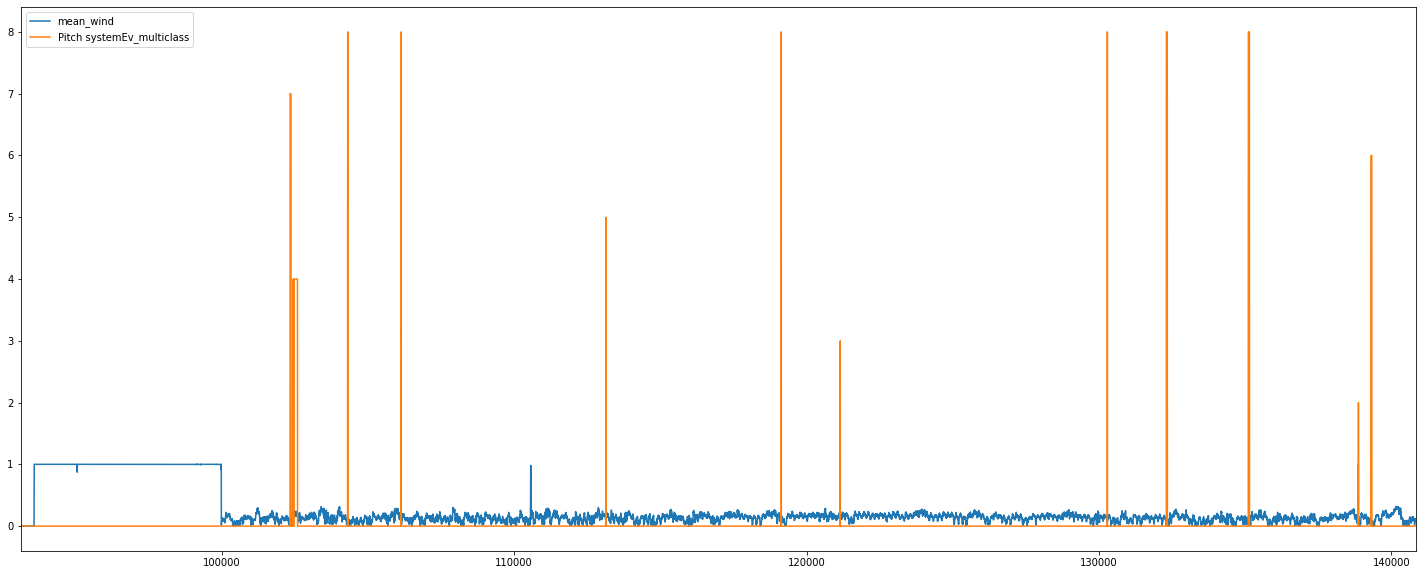

In [94]:
T22[['mean_wind','Pitch systemEv_multiclass']].plot(figsize=(25,10))

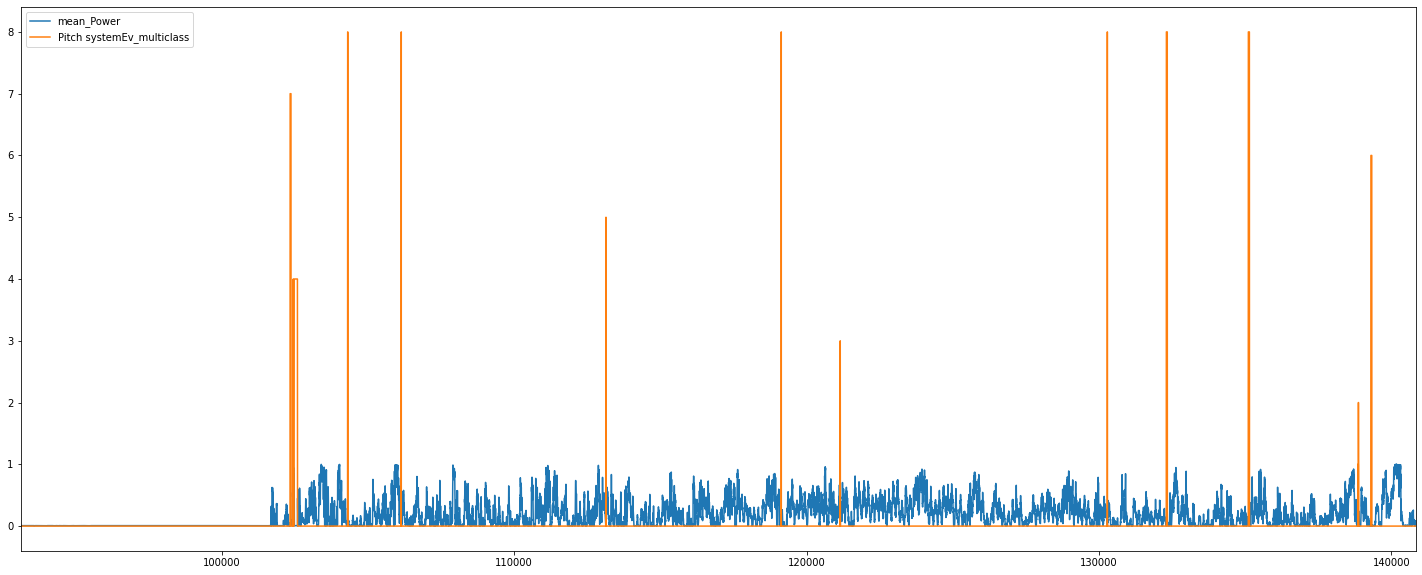

In [90]:
T22[['mean_Power','Pitch systemEv_multiclass']].plot(figsize=(25,10))

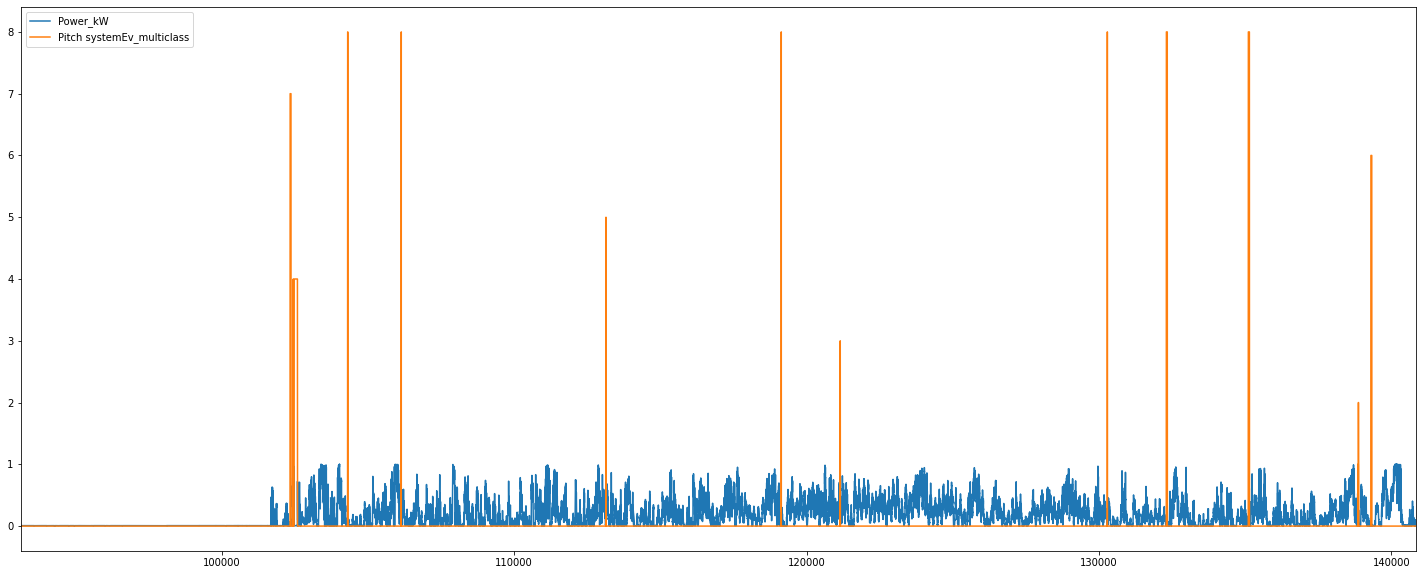

In [69]:
T22[['Power_kW','Pitch systemEv_multiclass']].plot(figsize=(25,10))

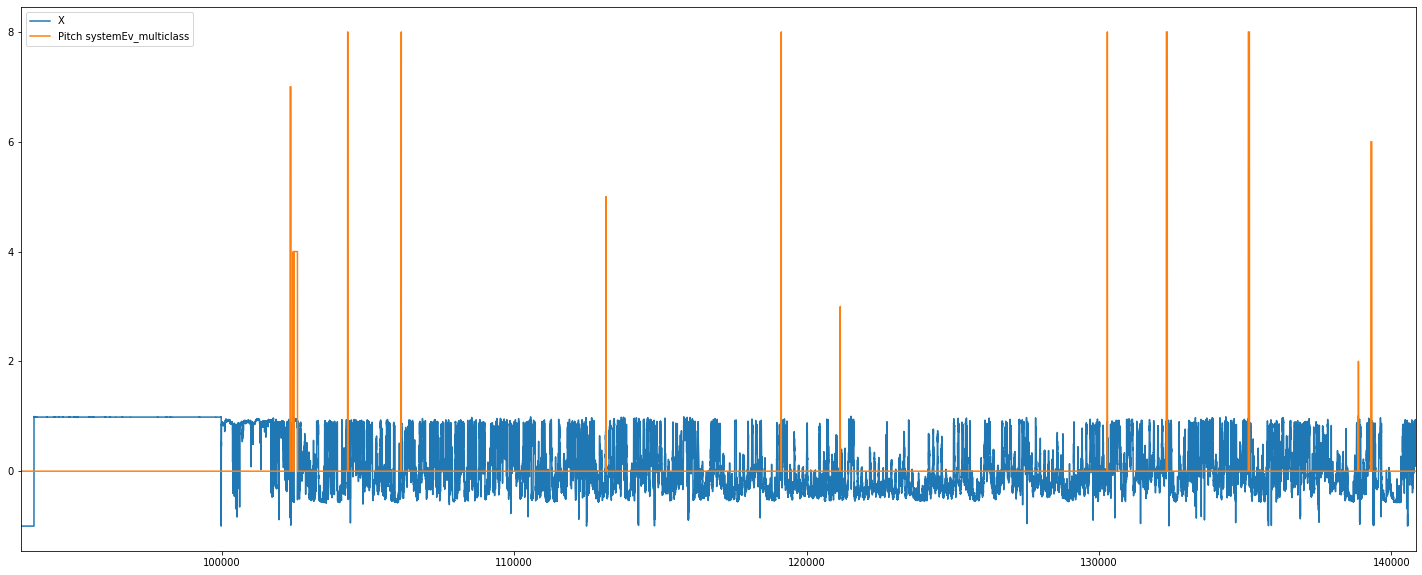

In [65]:
T22[['X','Pitch systemEv_multiclass']].plot(figsize=(25,10))

In [24]:
AllLabels_df[AllLabels_df['TURBINE_NUMBER']=='T03'].shape

(48099, 99)

In [17]:
AllLabels_df.head()

,Brake system,Brake systemEv,Brake systemEv_multiclass,Components,Components_multiclass,Converter,ConverterEv,ConverterEv_multiclass,Events,Events_0,...,Top Control CabinetEv_multiclass,Turbine control system,Turbine control systemEv,Turbine control systemEv_multiclass,Ultrasonic Anomemeter,Ultrasonic AnomemeterEv,Ultrasonic AnomemeterEv_multiclass,Yaw system,Yaw systemEv,Yaw systemEv_multiclass
45023,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0
45024,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0
45025,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0
45026,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0
45027,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0


In [6]:
AllLabels_df['Events_EVENT_121']

45023     0.0
45024     0.0
45025     0.0
45026     0.0
45027     0.0
         ... 
234687    0.0
234688    0.0
234689    0.0
234690    0.0
234691    0.0
Name: Events_EVENT_121, Length: 143110, dtype: float64

In [13]:
selected_df=Features_df[['Blade2_act_val_A_degree','Blade1_act_val_degree','Blade3_act_val_A_degree','GBX_bearing_hollow_shaft_temp_C','Generator_rpm','Shaft_bearing1_temp_C','Shaft_bearing2_temp_C','Ambient_temp_C','GBX_bearing_hollow_shaft_temp_C','Prox_sensor135_mm','GBX_Distr_temp_C']]
#selected_df=T02[['Blade2_act_val_A_degree','Blade1_act_val_degree','Blade3_act_val_A_degree','GBX_bearing_hollow_shaft_temp_C','Generator_rpm','Shaft_bearing1_temp_C','Shaft_bearing2_temp_C','Ambient_temp_C','GBX_bearing_hollow_shaft_temp_C','Prox_sensor135_mm']]


In [9]:
selected_df=Features_df[['Blade2_act_val_A_degree','Blade1_act_val_degree','Blade3_act_val_A_degree','GBX_bearing_hollow_shaft_temp_C','Generator_rpm',
                         'GBX_bearing_hollow_shaft_temp_C''GBX_bearing_hollow_shaft_temp_C','GBX_bearing_hollow_shaft_temp_C']]


KeyError: "['GBX_bearing_hollow_shaft_temp_CGBX_bearing_hollow_shaft_temp_C'] not in index"

In [39]:
selected_df=Features_df[['Blade2_act_val_A_degree','Blade1_act_val_degree','Blade3_act_val_A_degree','GBX_bearing_hollow_shaft_temp_C','Generator_rpm','Shaft_bearing1_temp_C','Shaft_bearing2_temp_C','Ambient_temp_C',
                         'GBX_bearing_hollow_shaft_temp_C','Prox_sensor135_mm']]


In [14]:
pca = PCA(n_components=3)
pca.fit(selected_df)
X_trains_pca = pca.transform(selected_df)

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE()
embedding = tsne.fit_transform(X_trains_pca)

In [6]:
import numpy as numpy
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import StandardScaler

data=embeding
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))
sdata=scaler.transform(data)
#eps=[27,28,29,35,36,37,40] min_samples=60
#best: 36 accuracy precision recall f1_test 0.9938475890100615 0.936373276776246 0.8027272727272727 0.8644150758688203
#eps=[36] min_samples=60,50,40
#best: 40 accuracy precision recall f1_test 0.9942473846700576 0.9430979978925185 0.8136363636363636 0.8735968765251341
#T02 dbscan = DBSCAN(eps = 0.36,min_samples = 40).fit(sdata)
dbscan = DBSCAN(eps = 0.36,min_samples = 40).fit(sdata)
AllLabels_df['Pitch system'].values,dbscan.labels_
clusters = pd.get_dummies(dbscan.labels_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[-6.50212404e-16 -1.66207672e-16  5.70688135e-16]
[[ 1.21904444 -1.90815054 -2.63745472]
 [ 1.22095453 -1.82542781 -2.67925472]
 [ 1.21119023 -1.80876584 -2.66052535]
 ...
 [ 1.28304009  0.12853652  2.33330304]
 [ 1.30120663  0.07568224  2.34212079]
 [ 1.34286695  0.09802736  2.24968596]]


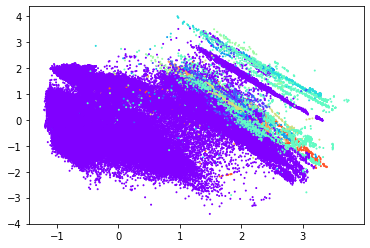

In [7]:
plt.scatter(sdata[:,0], sdata[:,1],s=1, c=AllLabels_df.Components_multiclass,cmap="rainbow")

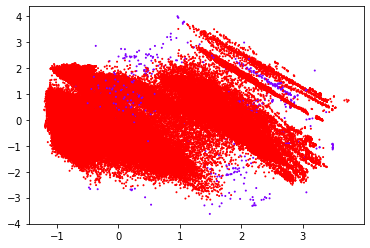

In [8]:
plt.scatter(sdata[:,0], sdata[:,1],s=1, c=dbscan.labels_,cmap="rainbow")

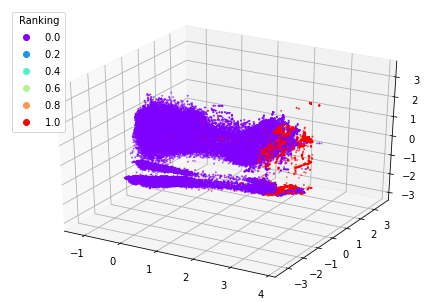

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X_trains[['Blade2_act_val_A_degree']], X_trains[['Blade1_set_val_degree']], X_trains[['Blade3_act_val_A_degree']],s=1)
#ax.scatter(sdata[:,0], sdata[:,1], sdata[:,2],s=1,c=vectorizer(dbscan.labels_),cmap = "rainbow")
scatter=ax.scatter(sdata[:,0], sdata[:,1], sdata[:,2],s=1,c=AllLabels_df['Pitch system'],cmap = "rainbow")
legend1 = ax.legend(*scatter.legend_elements(num=6),
                    loc="upper left", title="Ranking")
plt.show()

<bound method PathCollection.legend_elements of <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x0000020A526A6488>>


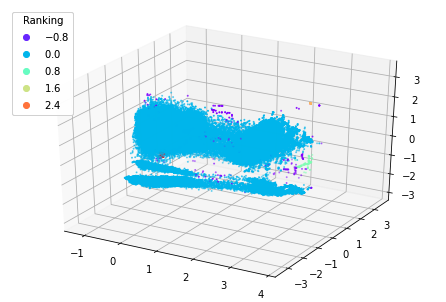

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X_trains[['Blade2_act_val_A_degree']], X_trains[['Blade1_set_val_degree']], X_trains[['Blade3_act_val_A_degree']],s=1)
#ax.scatter(sdata[:,0], sdata[:,1], sdata[:,2],s=1,c=vectorizer(dbscan.labels_),cmap = "rainbow")
scatter = ax.scatter(sdata[:,0], sdata[:,1], sdata[:,2],s=1,c=dbscan.labels_,cmap = "rainbow")
print(scatter.legend_elements)
legend1 = ax.legend(*scatter.legend_elements(num=6),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)
plt.show()

In [46]:
y_train=AllLabels_df['Pitch system']
for i in clusters.columns:
    accuracy_ = accuracy_score(y_train, clusters[i])
    precision_ = precision_score(y_train, clusters[i])
    recall_ = recall_score(y_train, clusters[i])
    f1_test = f1_score(y_train, clusters[i])
    print('accuracy','precision','recall','f1_test',accuracy_,precision_,recall_,f1_test)

accuracy precision recall f1_test 0.9822138992572884 0.3108108108108108 0.016771998055420515 0.031826568265682656
accuracy precision recall f1_test 0.017146343426811338 0.016372357585533577 0.9375303840544482 0.032182699608667716
accuracy precision recall f1_test 0.9830527863337669 1.0 0.02771025765678172 0.05392620624408703
accuracy precision recall f1_test 0.9828833141971046 1.0 0.01798736023334954 0.03533906399235912
accuracy precision recall f1_test 0.9824130290178666 0.0 0.0 0.0


In [101]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [294]:
clusters

,-1,0,1,2,3,4,5,6,7,8
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
48094,0,0,1,0,0,0,0,0,0,0
48095,0,0,1,0,0,0,0,0,0,0
48096,1,0,0,0,0,0,0,0,0,0
48097,0,1,0,0,0,0,0,0,0,0


In [295]:
y_train=AllLabels_df[AllLabels_df.TURBINE_NUMBER=='T03']['Pitch system']
#Grafiğe bakıyorum göz kararı eger birleşebilecek bir cluster varsa burda birleştiriyorum.
x=clusters[6]+clusters[8]
print(x.unique())
accuracy_ = accuracy_score(y_train, x)
precision_ = precision_score(y_train, x)
recall_ = recall_score(y_train, x)
f1_test = f1_score(y_train, x)
print('accuracy','precision','recall','f1_test',accuracy_,precision_,recall_,f1_test)

[0 1]
accuracy precision recall f1_test 0.9703320235347929 0.26724975704567544 0.290084388185654 0.278199291856348
